In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# Load the movies dataset
movies_path = r"C:\Users\Arian\Desktop\ADM HW4\Dataset\movie.csv"
movies = pd.read_csv(movies_path)

# Load the user interactions dataset
ratings_path = r"C:\Users\Arian\Desktop\ADM HW4\Dataset\rating.csv"
ratings = pd.read_csv(ratings_path)

In [2]:
movies.shape

(27278, 3)

In [3]:
ratings.shape

(20000263, 4)

In [4]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [6]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
# Merge datasets on movieId
df = pd.merge(ratings, movies, on="movieId")

In [9]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [10]:
# Split the genres column into a list of genres
df['genres'] = df['genres'].str.split('|')

# Display the updated dataframe
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),"[Adventure, Children, Fantasy]"
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...","[Adventure, Drama, Fantasy, Mystery, Sci-Fi]"
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]"
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]"
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"


In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

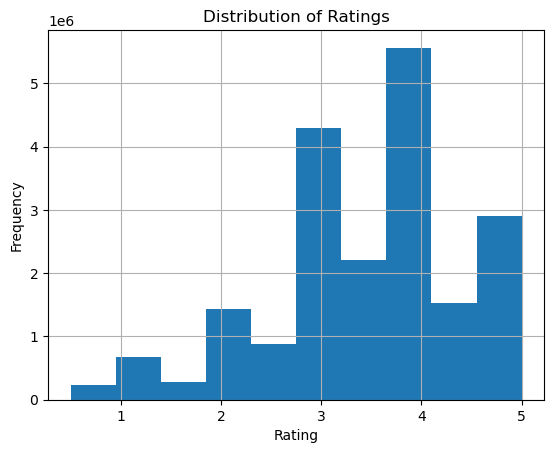

In [12]:
df['rating'].hist(bins=10)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Define MinHash function
def minhash(movie_ids, num_hashes, prime=10007):
    # Generate num_hashes hash functions (a * x + b) % prime
    hashes = []
    for i in range(num_hashes):
        a, b = np.random.randint(1, prime, size=2)
        hash_function = lambda x: (a * x + b) % prime
        hashes.append(hash_function)
    
    # Calculate MinHash signature
    signature = []
    for h in hashes:
        min_hash = min(h(movie_id) for movie_id in movie_ids)
        signature.append(min_hash)
    
    return signature

In [15]:
# Extract each user's rated movie list
user_movie_dict = df.groupby('userId')['movieId'].apply(list).to_dict()

In [17]:
# Generate MinHash signatures for all users
num_hashes = 10  # Number of hash functions
user_signatures = {user: minhash(movies, num_hashes) for user, movies in user_movie_dict.items()}

In [18]:
# Display a few sample signatures
sample_signatures = {user: sig for user, sig in list(user_signatures.items())[:5]}
print("Sample MinHash Signatures:")
for user, sig in sample_signatures.items():
    print(f"User {user}: {sig}")

Sample MinHash Signatures:
User 1: [30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
User 2: [478, 478, 478, 478, 478, 478, 478, 478, 478, 478]
User 3: [16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
User 4: [214, 214, 214, 214, 214, 214, 214, 214, 214, 214]
User 5: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60]


In [20]:
# Save signatures for similarity calculation
user_signatures_df = pd.DataFrame.from_dict(user_signatures, orient='index')
print(user_signatures_df.head())  # Display the first few rows


     0    1    2    3    4    5    6    7    8    9
1   30   30   30   30   30   30   30   30   30   30
2  478  478  478  478  478  478  478  478  478  478
3   16   16   16   16   16   16   16   16   16   16
4  214  214  214  214  214  214  214  214  214  214
5   60   60   60   60   60   60   60   60   60   60


In [21]:
def lsh_buckets(signatures, num_bands, rows_per_band, prime=10007):
    """
    Divide MinHash signatures into bands and hash each band into buckets.
    :param signatures: Dictionary of user MinHash signatures.
    :param num_bands: Number of bands.
    :param rows_per_band: Rows per band.
    :param prime: Large prime number for hashing.
    :return: Buckets containing users grouped by band hashes.
    """
    from collections import defaultdict
    
    buckets = defaultdict(list)
    for user, signature in signatures.items():
        for band in range(num_bands):
            start = band * rows_per_band
            end = start + rows_per_band
            band_hash = hash(tuple(signature[start:end])) % prime
            buckets[(band, band_hash)].append(user)
    
    return buckets

# Parameters for LSH
num_bands = 5
rows_per_band = len(sample_signatures[list(sample_signatures.keys())[0]]) // num_bands

# Apply LSH on MinHash signatures
lsh_buckets_output = lsh_buckets(user_signatures, num_bands, rows_per_band)
print("Sample Buckets (first 5):")
for k, v in list(lsh_buckets_output.items())[:5]:
    print(f"Bucket {k}: Users {v}")

Sample Buckets (first 5):
Bucket (0, 8080): Users [1, 45, 256, 635, 638, 645, 1288, 1297, 1586, 2163, 2356, 2640, 3113, 3121, 3347, 3752, 3921, 4057, 4214, 4301, 4771, 5060, 5166, 5335, 5545, 5657, 5731, 5897, 6025, 6386, 6414, 6656, 6727, 6803, 6966, 7330, 7453, 7463, 7889, 7894, 8112, 8253, 8417, 8505, 8577, 8615, 8707, 8725, 8786, 8870, 9051, 9095, 9180, 9208, 9244, 9431, 9732, 9768, 9877, 9911, 9933, 9949, 10138, 10369, 10487, 10617, 10801, 11026, 11030, 11144, 11242, 11352, 11428, 11477, 11598, 11856, 11914, 12124, 12292, 12512, 12533, 12682, 13002, 13570, 13615, 13735, 13817, 14003, 14031, 14223, 14247, 14408, 14470, 14471, 14647, 14669, 14841, 14882, 14885, 14944, 15039, 15093, 15169, 15306, 15649, 15726, 15819, 15870, 15929, 16133, 16201, 16275, 16441, 16704, 16750, 16925, 16946, 17022, 17494, 17868, 17911, 17929, 17988, 18104, 18311, 18560, 18770, 19042, 19489, 19518, 19753, 19766, 19864, 19884, 20117, 20121, 20134, 20139, 20479, 20750, 20903, 21106, 21344, 21498, 21622, 21668

In [22]:
def find_similar_users(user_id, buckets, signatures):
    """
    Find the two most similar users based on shared buckets.
    :param user_id: Target user ID.
    :param buckets: Buckets created by LSH.
    :param signatures: MinHash signatures of all users.
    :return: Two most similar users.
    """
    similar_users = set()
    target_signature = signatures[user_id]
    
    for band_hash, users in buckets.items():
        if user_id in users:
            similar_users.update(users)
    
    similar_users.discard(user_id)  # Remove the user itself
    # Calculate similarity based on MinHash signatures
    similarity = {
        other_user: sum(1 for x, y in zip(target_signature, signatures[other_user]) if x == y) / len(target_signature)
        for other_user in similar_users
    }
    # Sort by similarity score and return top 2
    return sorted(similarity, key=similarity.get, reverse=True)[:2]

# Example query
target_user = list(user_signatures.keys())[0]
similar_users = find_similar_users(target_user, lsh_buckets_output, user_signatures)
print(f"Most similar users to User {target_user}: {similar_users}")

Most similar users to User 1: [12292, 36871]


In [28]:
def recommend_movies_from_merged(user_id, similar_users, merged_df, top_n=5):
    """
    Recommend movies based on similar users' ratings using a merged dataset.
    :param user_id: Target user ID.
    :param similar_users: List of most similar users.
    :param merged_df: Merged DataFrame containing userId, movieId, title, and rating.
    :param top_n: Number of movies to recommend.
    :return: List of recommended movie titles.
    """
    # Movies already rated by the target user
    user_rated_movies = set(merged_df[merged_df['userId'] == user_id]['movieId'])
    recommendations = []

    for similar_user in similar_users:
        # Movies rated by the similar user
        similar_user_movies = merged_df[merged_df['userId'] == similar_user]
        # Exclude movies already rated by the target user
        for _, row in similar_user_movies.iterrows():
            if row['movieId'] not in user_rated_movies:
                recommendations.append((row['movieId'], row['rating']))

    # Sort recommendations by rating and select top N
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
    top_recommendations = [movie_id for movie_id, _ in recommendations[:top_n]]

    # Get movie titles from the merged dataset
    movie_titles = df[df['movieId'].isin(top_recommendations)]['title'].unique().tolist()
    return movie_titles

# Example usage
recommended_movies = recommend_movies_from_merged(target_user, similar_users, df)
print(f"Recommended movies for User {target_user}: {recommended_movies}")


Recommended movies for User 1: ['Princess Bride, The (1987)', 'Fried Green Tomatoes (1991)', 'Fantasia (1940)', 'Good Will Hunting (1997)', 'Whale Rider (2002)']
